# mehmetfatih

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }

In [2]:
temperature = pd.read_csv('dataset/weatherHistory.csv', index_col=0)
temperature.index.name=['Tarih']
temperature.columns= ['genel_durum','yagis','sicaklik','hissedilen_sicaklik','nem','ruzgar_hizi','ruzgar', 'gorus_mesafesi', 'loud_cover','basinc', 'gunluk_durum']
temperature.tail(2)

,genel_durum,yagis,sicaklik,hissedilen_sicaklik,nem,ruzgar_hizi,ruzgar,gorus_mesafesi,loud_cover,basinc,gunluk_durum
[Tarih],,,,,,,,,,,
2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


## Q 1 :
Hedef değişkeninizin görünür sıcaklık ve sıcaklık arasındaki fark olduğu doğrusal bir regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem ve rüzgar hızı kullanın. Şimdi, modelinizi OLS kullanarak tahmin edin. Tahmin edilen katsayılar istatistiksel olarak anlamlı mıdır? Tahmini katsayılar önceki beklentileriniz doğrultusunda mı? Tahmin edilen katsayıları yorumlayınız. Hedef ve açıklayıcı değişkenler arasındaki ilişkiler nelerdir?

In [4]:
temperature['sicaklik_farki']=temperature['sicaklik']-temperature['hissedilen_sicaklik']

In [29]:
temperature.corr().sicaklik_farki.abs()

sicaklik               0.635285
hissedilen_sicaklik    0.724200
nem                    0.242212
ruzgar_hizi            0.411943
ruzgar                 0.014357
gorus_mesafesi         0.197113
loud_cover                  NaN
basinc                 0.029598
sicaklik_farki         1.000000
Name: sicaklik_farki, dtype: float64

In [5]:
Y = temperature['sicaklik_farki']
X = temperature[['nem','ruzgar_hizi']]
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [3.02918594 0.11929075]
Sabit değer (bias): 
 -2.4381054151877017


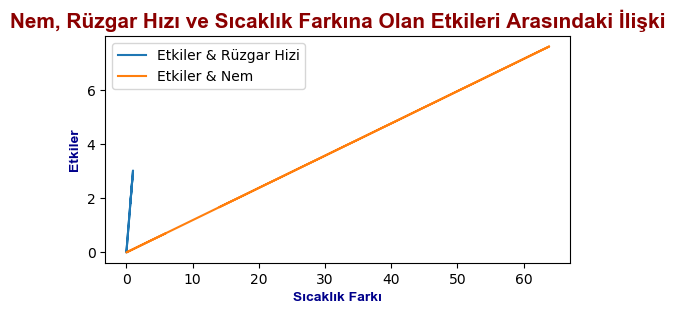

In [40]:
plt.figure(figsize=(6,3), dpi = 100)

nem_etkisi = temperature['nem'] * 3.0292
ruzgar_hizi_etkisi = temperature['ruzgar_hizi'] * 0.1193
plt.plot(temperature['nem'], nem_etkisi)
plt.plot(temperature['ruzgar_hizi'], ruzgar_hizi_etkisi)
plt.legend(["Etkiler & Rüzgar Hizi", "Etkiler & Nem"])
plt.xlabel("Sıcaklık Farkı", fontdict=eksen_font)
plt.ylabel("Etkiler", fontdict=eksen_font)
plt.title("Nem, Rüzgar Hızı ve Sıcaklık Farkına Olan Etkileri Arasındaki İlişki", fontdict=baslik_font)

plt.show()

In [22]:
X = sm.add_constant(X)

sonuclar = sm.OLS(Y, X).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         sicaklik_farki   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:19:34   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.4381      0.021   -115.948      0.000      -2.479      -2.397
nem             3.0292      0.024    126.479      0.000       2.982       3.076
ruzgar_hizi     0.1193      0.001    176.164      0.000       0.118       0.121
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nem ve hiz değişkenleri sürekli değişkenlerdir. Yukarıdaki tablodan da görüleceği gibi istatistiksel olarak anlamlıdır. 

## Q 2 :
Ardından, yukarıdaki modele nem ve rüzgar hızı etkileşimini dahil edin ve OLS'yi kullanarak modeli tahmin edin. Katsayılar istatistiksel olarak anlamlı mıdır? Nem ve rüzgar hızı için tahmini katsayıların işaretleri değişti mi? Tahmin edilen katsayıları yorumlayınız.

In [32]:
Y = temperature['sicaklik_farki']
temperature['nem_ruzgarhizi']=temperature['nem']*temperature['ruzgar_hizi']
X = temperature[['nem','ruzgar_hizi','nem_ruzgarhizi']]
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-0.17751219 -0.09048213  0.29711946]
Sabit değer (bias): 
 -0.0839363100978221


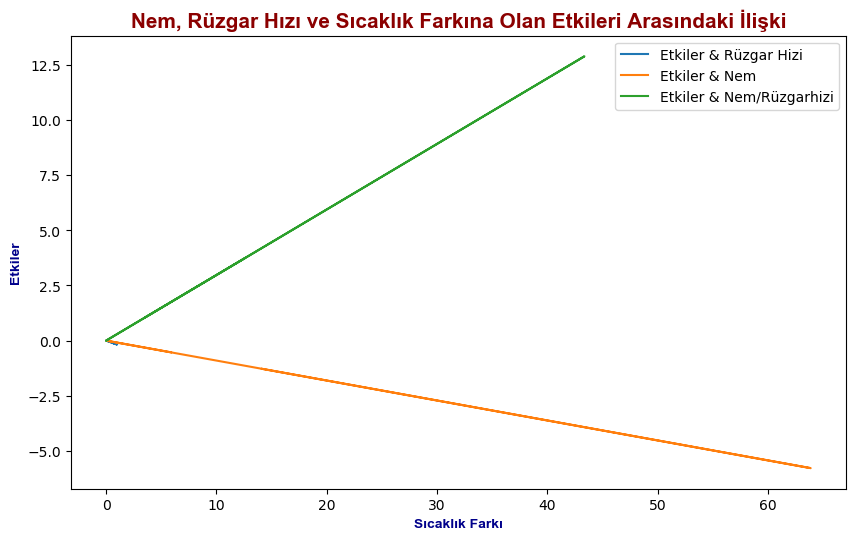

In [37]:
plt.figure(figsize=(10,6), dpi = 100)

nem_etkisi = temperature['nem'] * -0.17751219
ruzgar_hizi_etkisi = temperature['ruzgar_hizi'] * -0.09048213
nem_ruzgarhizi_etkisi=temperature['nem_ruzgarhizi'] * 0.29711946

plt.plot(temperature['nem'], nem_etkisi)
plt.plot(temperature['ruzgar_hizi'], ruzgar_hizi_etkisi)
plt.plot(temperature['nem_ruzgarhizi'], nem_ruzgarhizi_etkisi)
plt.legend(["Etkiler & Rüzgar Hizi", "Etkiler & Nem", "Etkiler & Nem/Rüzgarhizi"])
plt.xlabel("Sıcaklık Farkı", fontdict=eksen_font)
plt.ylabel("Etkiler", fontdict=eksen_font)
plt.title("Nem, Rüzgar Hızı ve Sıcaklık Farkına Olan Etkileri Arasındaki İlişki", fontdict=baslik_font)

plt.show()

In [38]:
X = sm.add_constant(X)

sonuclar = sm.OLS(Y, X).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         sicaklik_farki   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:55:39   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0839      0.033     -2.511      0.012      -0.149      -0.018
nem               -0.1775      0.043     -4.133      0.000      -0.262      -0.093
ruzgar_hizi       -0.0905      0.002    -36.797      0.000      -0.095      -0.086
nem_ruzgarhizi     0.2971      0.003     88.470      0.000       0.291       0.304
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Doğrusal regresyon modeli gerçek katsayıları doğru bir şekilde tahmin etmiş ve hedef ile özellik arasındaki ikinci dereceden ilişkiyi yakalamıştır.

Her iki testin p-değerleri, hatalarımızın normal olarak dağılmadığını gösterir.

WORK FİNİSHED.